In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#changing the directory 
cd drive/My Drive

/content/drive/My Drive


In [3]:
#unzipping the vaihingen dataset
!unzip ISPRS_semantic_labeling_Vaihingen.zip

Archive:  ISPRS_semantic_labeling_Vaihingen.zip
replace dsm/dsm_09cm_matching_area33.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dsm/dsm_09cm_matching_area33.tif  
  inflating: dsm/dsm_09cm_matching_area32.tif  
  inflating: dsm/dsm_09cm_matching_area29.tif  
  inflating: dsm/dsm_09cm_matching_area17.tif  
  inflating: dsm/dsm_09cm_matching_area2.tif  
  inflating: dsm/dsm_09cm_matching_area28.tif  
  inflating: dsm/dsm_09cm_matching_area6.tif  
  inflating: dsm/dsm_09cm_matching_area3.tif  
  inflating: dsm/dsm_09cm_matching_area21.tif  
  inflating: dsm/dsm_09cm_matching_area22.tif  
  inflating: dsm/dsm_09cm_matching_area7.tif  
  inflating: dsm/dsm_09cm_matching_area13.tif  
  inflating: dsm/dsm_09cm_matching_area16.tif  
  inflating: dsm/dsm_09cm_matching_area37.tif  
  inflating: dsm/dsm_09cm_matching_area35.tif  
  inflating: dsm/dsm_09cm_matching_area4.tif  
  inflating: dsm/dsm_09cm_matching_area5.tif  
  inflating: dsm/dsm_09cm_matching_area34.tif  
  inflating:

In [0]:
#importing the libraries
from skimage import io
import skimage
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import shutil

In [5]:
#checking the number of images under each folder
print(len(os.listdir('gts_for_participants')))
print(len(os.listdir('top')))

16
33


In [6]:
#getting the ids of the images with ground truth
ids=[]
for t_im in os.listdir('gts_for_participants'):
  ids.append(t_im.split('area')[1].split('.')[0])
print(len(ids))
print(ids)

16
['17', '15', '7', '5', '32', '37', '3', '13', '21', '11', '23', '26', '34', '30', '1', '28']


In [9]:
#extracting the full image names of the given ground truth images and storing them in a list
list_for_top=[]
for id in ids:
  for t_im in os.listdir('top'):
    print(id)
    if(int(id) == int(t_im.split('area')[1].split('.')[0])):
      list_for_top.append(t_im)
      print(t_im)
      break

17
17
top_mosaic_09cm_area17.tif
15
15
15
top_mosaic_09cm_area15.tif
7
7
7
7
7
7
7
top_mosaic_09cm_area7.tif
5
5
5
5
5
5
5
5
5
top_mosaic_09cm_area5.tif
32
32
32
32
32
32
32
32
32
32
32
32
top_mosaic_09cm_area32.tif
37
37
37
37
37
37
37
37
37
37
37
37
37
top_mosaic_09cm_area37.tif
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
top_mosaic_09cm_area3.tif
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
top_mosaic_09cm_area13.tif
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
top_mosaic_09cm_area21.tif
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
top_mosaic_09cm_area11.tif
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
top_mosaic_09cm_area23.tif
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
top_mosaic_09cm_area26.tif
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
top_mosaic_09cm_area34.tif
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30

In [10]:
#checking the list
for i in list_for_top:
  print(i)
print(len(list_for_top))

top_mosaic_09cm_area17.tif
top_mosaic_09cm_area15.tif
top_mosaic_09cm_area7.tif
top_mosaic_09cm_area5.tif
top_mosaic_09cm_area32.tif
top_mosaic_09cm_area37.tif
top_mosaic_09cm_area3.tif
top_mosaic_09cm_area13.tif
top_mosaic_09cm_area21.tif
top_mosaic_09cm_area11.tif
top_mosaic_09cm_area23.tif
top_mosaic_09cm_area26.tif
top_mosaic_09cm_area34.tif
top_mosaic_09cm_area30.tif
top_mosaic_09cm_area1.tif
top_mosaic_09cm_area28.tif
16


In [11]:
#appending 'top/' to get the full path of the images
for x in range(len(list_for_top)):
  list_for_top[x]=str('top/'+list_for_top[x])
for i in range(len(list_for_top)):
  print(list_for_top[i])

top/top_mosaic_09cm_area17.tif
top/top_mosaic_09cm_area15.tif
top/top_mosaic_09cm_area7.tif
top/top_mosaic_09cm_area5.tif
top/top_mosaic_09cm_area32.tif
top/top_mosaic_09cm_area37.tif
top/top_mosaic_09cm_area3.tif
top/top_mosaic_09cm_area13.tif
top/top_mosaic_09cm_area21.tif
top/top_mosaic_09cm_area11.tif
top/top_mosaic_09cm_area23.tif
top/top_mosaic_09cm_area26.tif
top/top_mosaic_09cm_area34.tif
top/top_mosaic_09cm_area30.tif
top/top_mosaic_09cm_area1.tif
top/top_mosaic_09cm_area28.tif


In [0]:
#making the ISPRS folder
os.mkdir('ISPRS')

In [0]:
#making the Vaihingen sub folder
os.mkdir('ISPRS/Vaihingen')

In [14]:
#changing the current directory
cd ISPRS/Vaihingen

/content/drive/My Drive/ISPRS/Vaihingen


In [0]:
#making the sub folders
os.mkdir('top')
os.mkdir('gts_for_participants')

In [16]:
#getting back to drive/My Drive/ISPRS
cd ..

/content/drive/My Drive/ISPRS


In [17]:
#getting back to drive/My Drive
cd ..

/content/drive/My Drive


In [18]:
#copying the img files to the ISPRS folder
c=0
for path in tqdm(os.listdir('top')):
  t_path='top/'+path
  new_path=shutil.copy(t_path,'ISPRS/Vaihingen/top')
  print(new_path)
  c=c+1
print(c)

  9%|▉         | 3/33 [00:00<00:03,  9.52it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area16.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area17.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area15.tif


 18%|█▊        | 6/33 [00:00<00:02,  9.82it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area8.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area10.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area12.tif


 24%|██▍       | 8/33 [00:00<00:02,  9.73it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area7.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area2.tif


 30%|███       | 10/33 [00:01<00:02,  8.83it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area5.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area31.tif


 36%|███▋      | 12/33 [00:01<00:02,  8.63it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area27.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area32.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area37.tif


 48%|████▊     | 16/33 [00:01<00:01,  9.67it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area33.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area22.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area35.tif


 55%|█████▍    | 18/33 [00:01<00:01,  9.98it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area6.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area3.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area20.tif


 67%|██████▋   | 22/33 [00:02<00:01, 10.24it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area13.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area21.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area11.tif


 73%|███████▎  | 24/33 [00:03<00:02,  3.70it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area14.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area23.tif


 79%|███████▉  | 26/33 [00:03<00:01,  4.91it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area26.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area38.tif


 85%|████████▍ | 28/33 [00:03<00:00,  6.04it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area34.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area4.tif


 91%|█████████ | 30/33 [00:04<00:00,  6.74it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area30.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area24.tif


100%|██████████| 33/33 [00:04<00:00,  7.21it/s]

ISPRS/Vaihingen/top/top_mosaic_09cm_area1.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area29.tif
ISPRS/Vaihingen/top/top_mosaic_09cm_area28.tif
33


  0%|          | 0/33 [00:00<?, ?it/s]

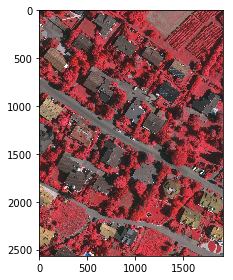

  3%|▎         | 1/33 [00:00<00:30,  1.06it/s]

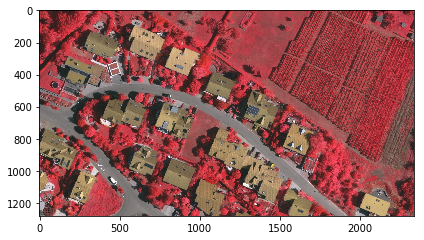

  6%|▌         | 2/33 [00:01<00:27,  1.15it/s]

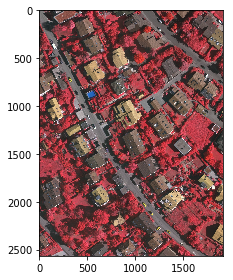

  9%|▉         | 3/33 [00:02<00:26,  1.14it/s]

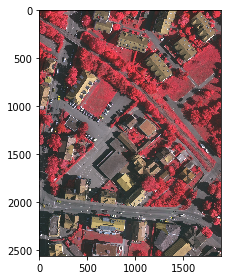

 12%|█▏        | 4/33 [00:03<00:25,  1.12it/s]

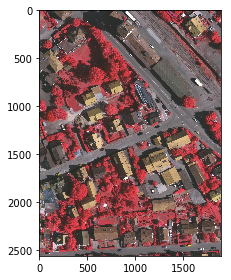

 15%|█▌        | 5/33 [00:04<00:24,  1.15it/s]

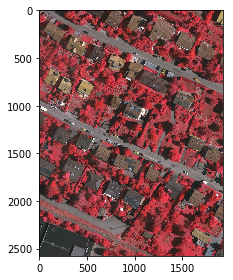

 18%|█▊        | 6/33 [00:05<00:23,  1.15it/s]

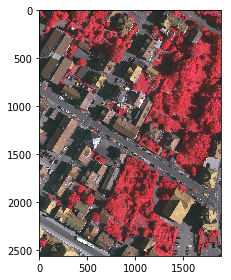

 21%|██        | 7/33 [00:05<00:22,  1.16it/s]

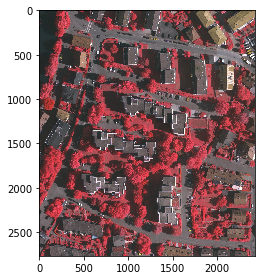

 24%|██▍       | 8/33 [00:06<00:22,  1.11it/s]

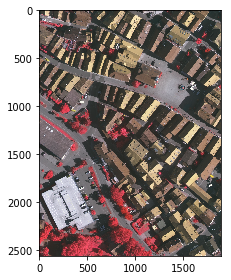

 27%|██▋       | 9/33 [00:07<00:20,  1.17it/s]

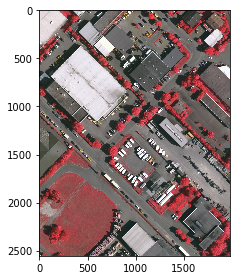

 30%|███       | 10/33 [00:08<00:19,  1.18it/s]

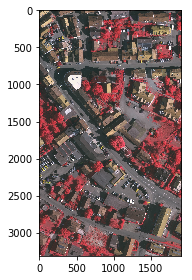

 33%|███▎      | 11/33 [00:09<00:19,  1.10it/s]

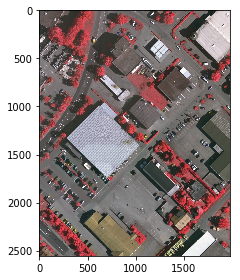

 36%|███▋      | 12/33 [00:10<00:19,  1.09it/s]

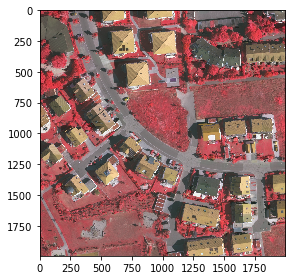

 39%|███▉      | 13/33 [00:11<00:18,  1.11it/s]

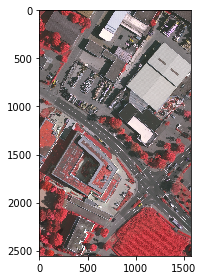

 42%|████▏     | 14/33 [00:12<00:16,  1.17it/s]

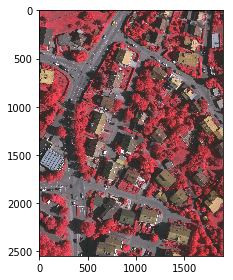

 45%|████▌     | 15/33 [00:12<00:15,  1.19it/s]

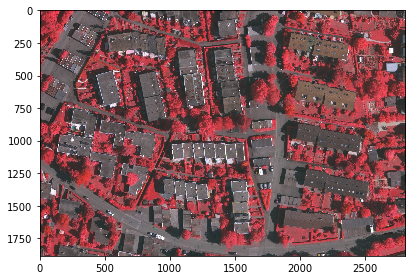

 48%|████▊     | 16/33 [00:13<00:14,  1.16it/s]

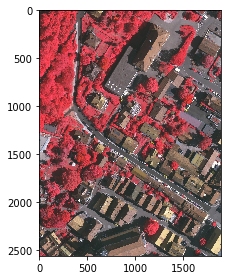

 52%|█████▏    | 17/33 [00:14<00:13,  1.16it/s]

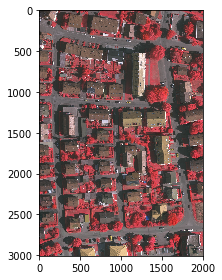

 55%|█████▍    | 18/33 [00:15<00:13,  1.12it/s]

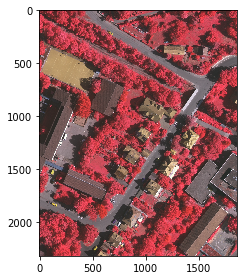

 58%|█████▊    | 19/33 [00:16<00:11,  1.20it/s]

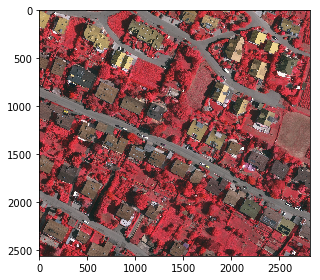

 61%|██████    | 20/33 [00:17<00:11,  1.09it/s]

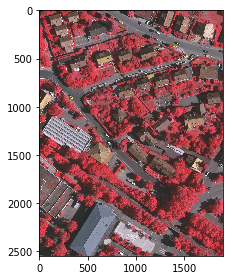

 64%|██████▎   | 21/33 [00:18<00:10,  1.14it/s]

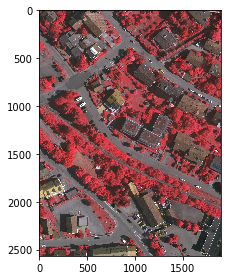

 67%|██████▋   | 22/33 [00:19<00:09,  1.18it/s]

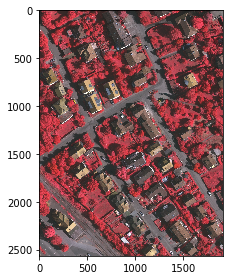

 70%|██████▉   | 23/33 [00:19<00:08,  1.22it/s]

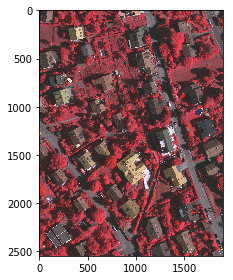

 73%|███████▎  | 24/33 [00:20<00:07,  1.24it/s]

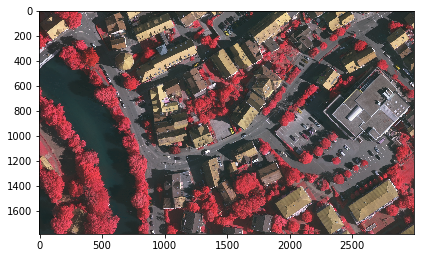

 76%|███████▌  | 25/33 [00:21<00:06,  1.19it/s]

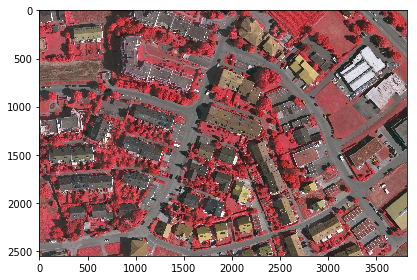

 79%|███████▉  | 26/33 [00:22<00:06,  1.01it/s]

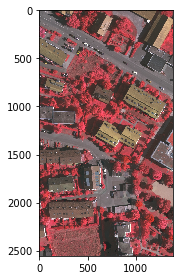

 82%|████████▏ | 27/33 [00:23<00:05,  1.11it/s]

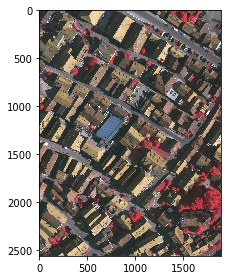

 85%|████████▍ | 28/33 [00:24<00:04,  1.17it/s]

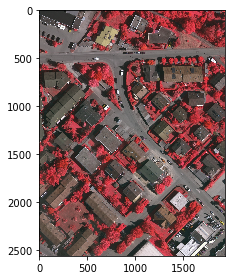

 88%|████████▊ | 29/33 [00:25<00:03,  1.20it/s]

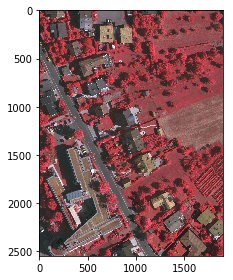

 91%|█████████ | 30/33 [00:25<00:02,  1.24it/s]

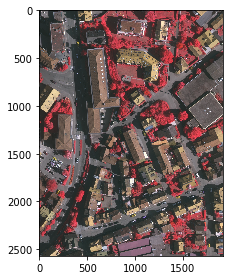

 94%|█████████▍| 31/33 [00:26<00:01,  1.26it/s]

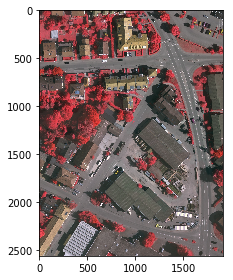

 97%|█████████▋| 32/33 [00:27<00:00,  1.27it/s]

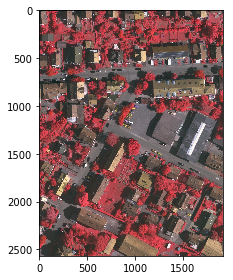

100%|██████████| 33/33 [00:28<00:00,  1.28it/s]


In [19]:
#checking the image files
for path in tqdm(os.listdir('ISPRS/Vaihingen/top')):
  io.imshow(io.imread('ISPRS/Vaihingen/top'+'/'+path))
  plt.show()

In [20]:
#copying the img files to ISPRS folder
c=0
for path in tqdm(os.listdir('gts_for_participants')):
  t_path='gts_for_participants/'+path
  new_path=shutil.copy(t_path,'ISPRS/Vaihingen/gts_for_participants')
  print(new_path)
  c=c+1
print(c)

 12%|█▎        | 2/16 [00:00<00:01, 11.78it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area17.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area15.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area7.tif


 31%|███▏      | 5/16 [00:00<00:01, 10.77it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area5.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area32.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area37.tif


 50%|█████     | 8/16 [00:00<00:00,  8.92it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area3.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area13.tif


 62%|██████▎   | 10/16 [00:01<00:00,  8.72it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area21.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area11.tif


 75%|███████▌  | 12/16 [00:01<00:00,  8.98it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area23.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area26.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area34.tif


 94%|█████████▍| 15/16 [00:01<00:00,  9.58it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area30.tif
ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area1.tif


100%|██████████| 16/16 [00:01<00:00,  9.39it/s]

ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area28.tif
16


  0%|          | 0/16 [00:00<?, ?it/s]

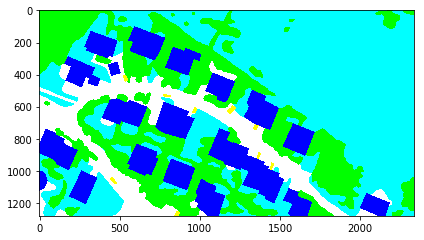

  6%|▋         | 1/16 [00:00<00:08,  1.85it/s]

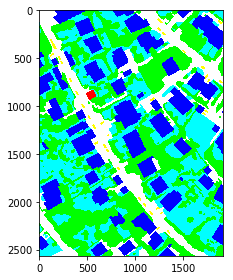

 12%|█▎        | 2/16 [00:01<00:08,  1.71it/s]

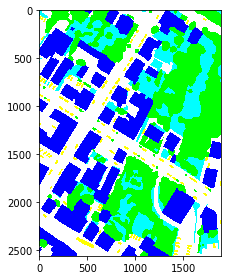

 19%|█▉        | 3/16 [00:01<00:08,  1.60it/s]

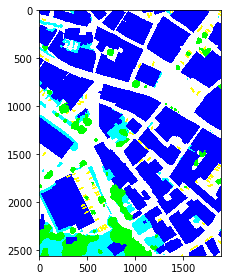

 25%|██▌       | 4/16 [00:02<00:07,  1.56it/s]

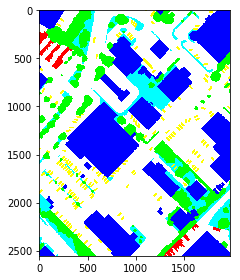

 31%|███▏      | 5/16 [00:03<00:07,  1.47it/s]

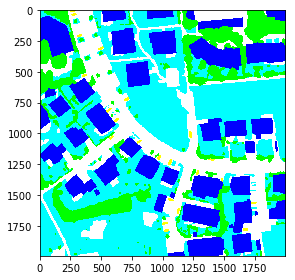

 38%|███▊      | 6/16 [00:04<00:06,  1.50it/s]

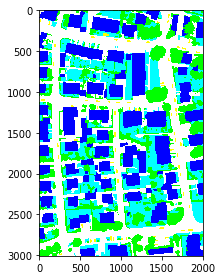

 44%|████▍     | 7/16 [00:04<00:06,  1.41it/s]

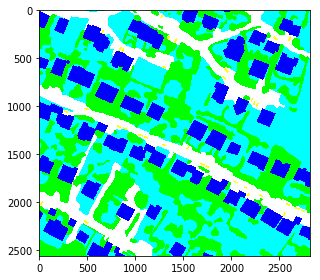

 50%|█████     | 8/16 [00:05<00:06,  1.22it/s]

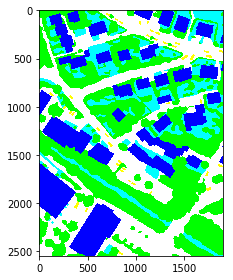

 56%|█████▋    | 9/16 [00:06<00:05,  1.24it/s]

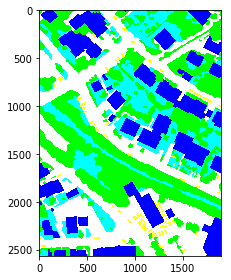

 62%|██████▎   | 10/16 [00:07<00:04,  1.28it/s]

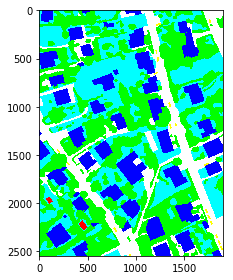

 69%|██████▉   | 11/16 [00:08<00:03,  1.28it/s]

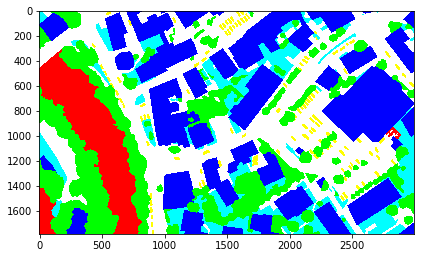

 75%|███████▌  | 12/16 [00:08<00:03,  1.28it/s]

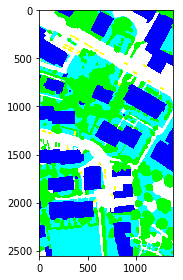

 81%|████████▏ | 13/16 [00:09<00:02,  1.40it/s]

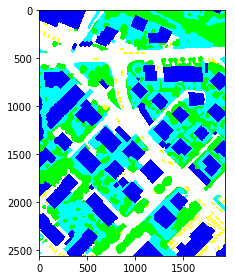

 88%|████████▊ | 14/16 [00:10<00:01,  1.41it/s]

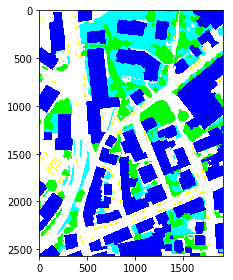

 94%|█████████▍| 15/16 [00:10<00:00,  1.42it/s]

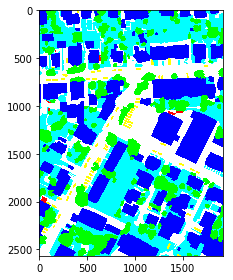

100%|██████████| 16/16 [00:11<00:00,  1.44it/s]


In [21]:
#visualizing the img
for path in tqdm(os.listdir('ISPRS/Vaihingen/gts_for_participants')):
  io.imshow(io.imread('ISPRS/Vaihingen/gts_for_participants'+'/'+path))
  plt.show()

In [0]:
#defining the color palette and the labels
label_values = ['imp_surfaces', 'building', 'low_vegetation',
                'tree', 'car', 'clutter']
# Color palette
palette = {0: (255, 255, 255),  # Impervious surfaces (white)
           1: (0, 0, 255),      # Buildings (dark blue)
           2: (0, 255, 255),    # Low vegetation (light blue)
           3: (0, 255, 0),      # Tree (green)
           4: (255, 255, 0),    # Car (yellow)
           5: (255, 0, 0),      # Clutter (red)
           6: (0, 0, 0)}        # Unclassified (black)
invert_palette = {(255, 255, 255): 0,  # Impervious surfaces (white)
                  (0, 0, 255): 1,      # Buildings (dark blue)
                  (0, 255, 255): 2,    # Low vegetation (light blue)
                  (0, 255, 0): 3,      # Tree (green)
                  (255, 255, 0): 4,    # Car (yellow)
                  (255, 0, 0): 5,      # Clutter (red)
                  (0, 0, 0): 6}        # Unclassified (black)
NUMBER_OF_CLASSES = len(label_values)

In [0]:
#defining the functions for color mapping
def convert_to_color(arr_2d, palette=palette):
    """ grayscale labels to RGB-color encoding """
    arr_3d = np.zeros((arr_2d.shape[0], arr_2d.shape[1], 3), dtype=np.uint8)

    for c, i in palette.items():
        m = arr_2d == c
        arr_3d[m] = i

    return arr_3d


def convert_from_color(arr_3d, palette=invert_palette):
    """ RGB-color encoding to grayscale labels """
    arr_2d = np.zeros((arr_3d.shape[0], arr_3d.shape[1]), dtype=np.uint8)

    for c, i in palette.items():
        m = np.all(arr_3d == np.array(c).reshape(1, 1, 3), axis=2)
        arr_2d[m] = i

    return arr_2d

In [0]:
#making the output folder
os.mkdir('ISPRS/Vaihingen/gts_numpy')

In [25]:
#output folder
OUTPUT_FOLDER='ISPRS/Vaihingen'+'/'+'gts_numpy'
OUTPUT_FOLDER

'ISPRS/Vaihingen/gts_numpy'

In [26]:
#saving the color mapped images
for f in tqdm(os.listdir('ISPRS/Vaihingen/gts_for_participants')):
    f2='ISPRS/Vaihingen/gts_for_participants'+'/'+f
    filename = f2.split('/')[-1]
    print(filename,'\n',f2)
    filename='.'.join([filename.split('.')[0],'png'])
    img = io.imread(f2)
    new_img = convert_from_color(img)
    io.imsave(OUTPUT_FOLDER + '/' + filename, new_img)

  0%|          | 0/16 [00:00<?, ?it/s]

top_mosaic_09cm_area17.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area17.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area17.png is a low contrast image
  warn('%s is a low contrast image' % fname)
  6%|▋         | 1/16 [00:00<00:12,  1.17it/s]

top_mosaic_09cm_area15.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area15.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area15.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 12%|█▎        | 2/16 [00:02<00:14,  1.04s/it]

top_mosaic_09cm_area7.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area7.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area7.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 19%|█▉        | 3/16 [00:03<00:14,  1.15s/it]

top_mosaic_09cm_area5.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area5.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area5.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 25%|██▌       | 4/16 [00:05<00:14,  1.25s/it]

top_mosaic_09cm_area32.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area32.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area32.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 31%|███▏      | 5/16 [00:06<00:14,  1.32s/it]

top_mosaic_09cm_area37.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area37.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area37.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 38%|███▊      | 6/16 [00:07<00:12,  1.26s/it]

top_mosaic_09cm_area3.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area3.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 44%|████▍     | 7/16 [00:09<00:12,  1.39s/it]

top_mosaic_09cm_area13.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area13.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area13.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 50%|█████     | 8/16 [00:11<00:12,  1.60s/it]

top_mosaic_09cm_area21.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area21.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area21.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 56%|█████▋    | 9/16 [00:12<00:10,  1.54s/it]

top_mosaic_09cm_area11.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area11.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area11.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 62%|██████▎   | 10/16 [00:14<00:09,  1.50s/it]

top_mosaic_09cm_area23.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area23.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area23.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 69%|██████▉   | 11/16 [00:15<00:07,  1.49s/it]

top_mosaic_09cm_area26.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area26.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area26.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 75%|███████▌  | 12/16 [00:17<00:06,  1.51s/it]

top_mosaic_09cm_area34.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area34.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area34.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 81%|████████▏ | 13/16 [00:18<00:04,  1.37s/it]

top_mosaic_09cm_area30.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area30.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area30.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 88%|████████▊ | 14/16 [00:19<00:02,  1.41s/it]

top_mosaic_09cm_area1.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area1.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
 94%|█████████▍| 15/16 [00:21<00:01,  1.41s/it]

top_mosaic_09cm_area28.tif 
 ISPRS/Vaihingen/gts_for_participants/top_mosaic_09cm_area28.tif


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/gts_numpy/top_mosaic_09cm_area28.png is a low contrast image
  warn('%s is a low contrast image' % fname)
100%|██████████| 16/16 [00:22<00:00,  1.43s/it]


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


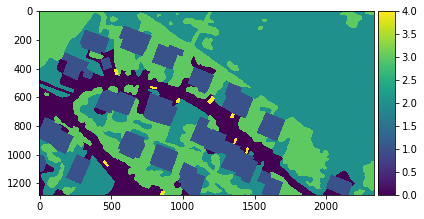

  6%|▋         | 1/16 [00:00<00:07,  1.99it/s]

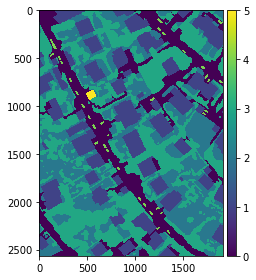

 12%|█▎        | 2/16 [00:01<00:07,  1.99it/s]

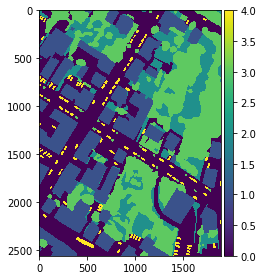

 19%|█▉        | 3/16 [00:01<00:06,  1.94it/s]

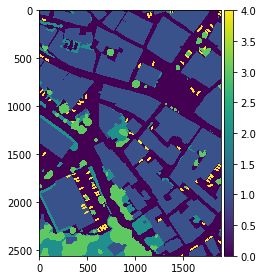

 25%|██▌       | 4/16 [00:02<00:06,  1.82it/s]

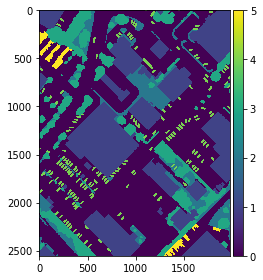

 31%|███▏      | 5/16 [00:02<00:05,  1.85it/s]

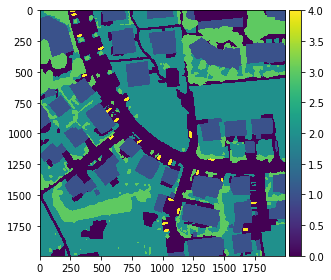

 38%|███▊      | 6/16 [00:03<00:05,  1.82it/s]

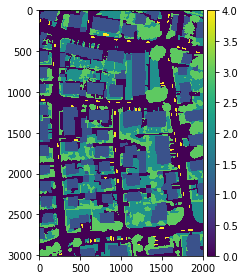

 44%|████▍     | 7/16 [00:03<00:05,  1.76it/s]

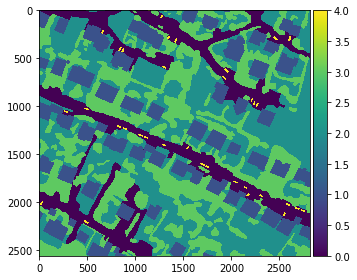

 50%|█████     | 8/16 [00:04<00:04,  1.71it/s]

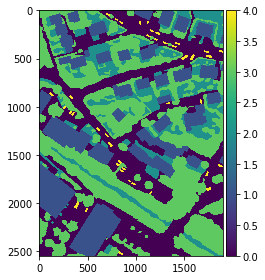

 56%|█████▋    | 9/16 [00:05<00:04,  1.75it/s]

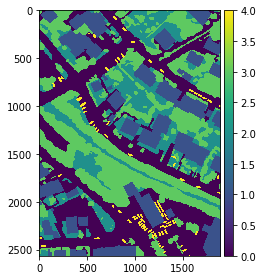

 62%|██████▎   | 10/16 [00:05<00:03,  1.79it/s]

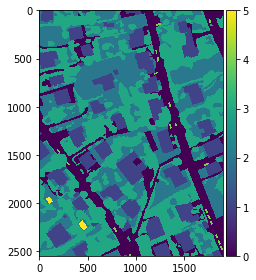

 69%|██████▉   | 11/16 [00:06<00:02,  1.83it/s]

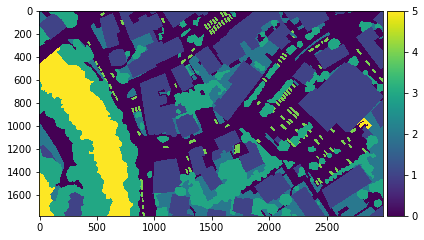

 75%|███████▌  | 12/16 [00:06<00:02,  1.81it/s]

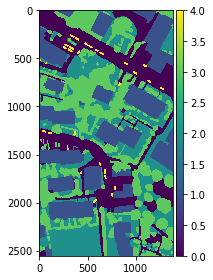

 81%|████████▏ | 13/16 [00:07<00:01,  1.89it/s]

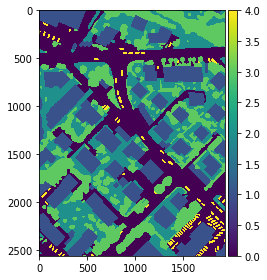

 88%|████████▊ | 14/16 [00:07<00:01,  1.89it/s]

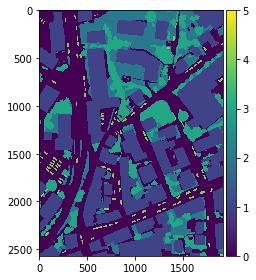

 94%|█████████▍| 15/16 [00:08<00:00,  1.79it/s]

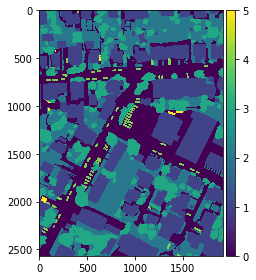

100%|██████████| 16/16 [00:08<00:00,  1.83it/s]


In [27]:
#visualizing the color mapped images
for path in tqdm(os.listdir('ISPRS/Vaihingen/gts_numpy')):
  io.imshow(io.imread('ISPRS/Vaihingen/gts_numpy'+'/'+path))
  plt.show()

In [0]:
#initializing the parameters 
patch_size = (320, 320)
step_size = 320
ROTATIONS = [90,180,270]
FLIPS = [True,True]

In [0]:
#assigning the base directory
BASE_DIR = 'ISPRS/'
DATASET = 'Vaihingen'
FOLDER_SUFFIX = '_fold1'
BASE_FOLDER = BASE_DIR + DATASET + '/'
BGR = True

In [0]:
#initializing the train and test ids
folders = [
    ('labels', BASE_FOLDER + 'gts_numpy/', 'top_mosaic_09cm_area{}.png'),
    ('irrg', BASE_FOLDER + 'top/', 'top_mosaic_09cm_area{}.tif')
]
train_ids = [(1,), (3,), (5,), (7,), (11,), (13,), (15,),
             (17,),(21,), (23,), (26,), (28,), (30,)]
test_ids = [(32,), (34,), (37,)]

In [11]:
#assigning the output directory
DATASET_DIR = BASE_FOLDER + DATASET.lower() + '_{}_{}_{}'.format(
                                    patch_size[0], patch_size[1], step_size)
DATASET_DIR += '/'
DATASET_DIR

'ISPRS/Vaihingen/vaihingen_320_320_320/'

In [0]:
#making the output directory
os.mkdir(DATASET_DIR)

In [0]:
#function for generating patches
def sliding_window(image, stride=320, window_size=(320,320)):
    """Extract patches according to a sliding window.
    Args:
        image (numpy array): The image to be processed.
        stride (int, optional): The sliding window stride (defaults to 10px).
        window_size(int, int, optional): The patch size (defaults to (20,20)).
    Returns:
        list: list of patches with window_size dimensions
    """
    patches = []
    # slide a window across the image
    for x in range(0, image.shape[0], stride):
        for y in range(0, image.shape[1], stride):
            new_patch = image[x:x + window_size[0], y:y + window_size[1]]
            if new_patch.shape[:2] == window_size:
                patches.append(new_patch)
    return patches


In [0]:
#function for generating transforms
def transform(patch, flip=False, mirror=False, rotations=[]):
    """Perform data augmentation on a patch.
    Args:
        patch (numpy array): The patch to be processed.
        flip (bool, optional): Up/down symetry.
        mirror (bool, optional): left/right symetry.
        rotations (int list, optional) : rotations to perform (angles in deg).
    Returns:
        array list: list of augmented patches
    """
    transformed_patches = [patch]
    for angle in rotations:
        transformed_patches.append(skimage.img_as_ubyte(skimage.transform.rotate(patch, angle)))
    if flip:
        transformed_patches.append(np.flipud(patch))
    if mirror:
        transformed_patches.append(np.fliplr(patch))
    return transformed_patches

In [0]:
#writing a text file about the parameters
details_file = open(DATASET_DIR + 'details.txt', 'w')
details_file.write('Dataset : ' + DATASET + '\n')
details_file.write('Training tiles : {}\n'.format(train_ids))
details_file.write('Testing tiles : {}\n'.format(test_ids))
details_file.write('Sliding window patch size : ({},{})'.format(*patch_size))
details_file.write('Sliding window stride : {}'.format(step_size))
details_file.close()

In [36]:
#generating patches and transforms and thus preparing the training and test sets
for suffix, folder, files in tqdm(folders):
    tqdm.write(("=== PROCESSING {} ===").format(suffix.upper()))

    # We create the subfolders splitted in train and test
    os.mkdir(DATASET_DIR + suffix + '_train')
    os.mkdir(DATASET_DIR + suffix + '_test')

    # Generate generators to read the iamges
    train_dataset = (io.imread(folder + files.format(*id_)) for id_ in train_ids)
    test_dataset = (io.imread(folder + files.format(*id_)) for id_ in test_ids)

    train_samples = []
    test_samples = []
    for image in tqdm(train_dataset):
        # Use the sliding window to extract the patches
        for patches in sliding_window(image, window_size=patch_size, stride=step_size):
            # Append the augmented patches to the sequence
            train_samples.extend(transform(patches, flip=FLIPS[0], mirror=FLIPS[1], rotations=ROTATIONS))

    for image in tqdm(test_dataset):
        # Same as the previous loop, but without data augmentation (test dataset)
        # Sliding window with no overlap
        for patches in sliding_window(image, window_size=patch_size, stride=patch_size[0]):
            test_samples.extend(transform(patches))

    # We save the images on disk
    for i, sample in tqdm(enumerate(train_samples), total=len(train_samples), desc="Saving train samples"):
        io.imsave('{}/{}.png'.format(DATASET_DIR + suffix + '_train', i), sample)

    tqdm.write("({} training set: done)".format(suffix))

    for i, sample in tqdm(enumerate(test_samples), total=len(test_samples), desc="Saving test samples"):
        io.imsave('{}/{}.png'.format(DATASET_DIR + suffix + '_test', i), sample)
    tqdm.write("({} testing set: done)".format(suffix))


print ("All done ! The dataset has been saved in {}.".format(DATASET_DIR))

  0%|          | 0/2 [00:00<?, ?it/s]
0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


=== PROCESSING LABELS ===



1it [00:00,  1.77it/s]
2it [00:01,  1.61it/s]
3it [00:01,  1.72it/s]
4it [00:02,  1.81it/s]
5it [00:02,  1.81it/s]
6it [00:03,  1.61it/s]
7it [00:04,  1.67it/s]
8it [00:04,  1.86it/s]
9it [00:05,  1.91it/s]
10it [00:05,  1.95it/s]
11it [00:06,  1.84it/s]
12it [00:06,  1.83it/s]
13it [00:07,  1.73it/s]

0it [00:00, ?it/s]
3it [00:00, 38.13it/s]
Saving train samples:   0%|          | 0/3186 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_train/0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_train/1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_train/2.png is a low contrast image
  warn('%s is a low contrast imag

(labels training set: done)


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/9.png is a low contrast image
  warn('%s is a low contrast image' % fname)

Saving test samples:   9%|▉         | 10/106 [00:00<00:02, 41.77it/s]/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/10.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/11.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/12.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ISPRS/Vaihingen/vaihingen_320_320_320/labels_test/13

(labels testing set: done)
=== PROCESSING IRRG ===



1it [00:01,  1.70s/it]
2it [00:04,  1.90s/it]
3it [00:05,  1.78s/it]
4it [00:07,  1.69s/it]
5it [00:08,  1.70s/it]
6it [00:11,  1.89s/it]
7it [00:12,  1.83s/it]
8it [00:13,  1.64s/it]
9it [00:15,  1.59s/it]
10it [00:16,  1.55s/it]
11it [00:18,  1.68s/it]
12it [00:20,  1.69s/it]
13it [00:22,  1.79s/it]

0it [00:00, ?it/s]
3it [00:00, 28.48it/s]

Saving test samples:   1%|          | 1/106 [00:00<00:16,  6.51it/s]

(irrg training set: done)



100%|██████████| 2/2 [08:39<00:00, 185.05s/it]

(irrg testing set: done)
All done ! The dataset has been saved in ISPRS/Vaihingen/vaihingen_320_320_320/.


In [0]:
import numpy as np
import lmdb
import glob
from skimage import img_as_float
from skimage import io
from random import shuffle
from tqdm import tqdm
import sys
import os

In [0]:
data_lmdbs = [(DATASET_DIR + 'irrg_train/', DATASET_DIR + 'irrg_train_lmdb')]

test_lmdbs = [(DATASET_DIR + 'irrg_test/', DATASET_DIR + 'irrg_test_lmdb')]

label_lmdbs = [(DATASET_DIR + 'labels_train/', DATASET_DIR + 'labels_train_lmdb')]

test_label_lmdbs = [(DATASET_DIR + 'labels_test/', DATASET_DIR + 'labels_test_lmdb')]


In [0]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [0]:
def unet(pretrained_weights = None,input_size = (320,320,3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'LeakyReLU', padding = 'valid', kernel_initializer = 'he_normal')(conv9)
    #conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(3, 3, activation = 'softmax')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    model.summary()


In [0]:
unet=unet()

In [0]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'ISPRS/Vaihingen/vaihingen_320_320_320/','irrg_train','labels_train',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_V.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

In [0]:
def change_patch(img):
  img1=img
  for i in range(80,220):
    for j in range(30,130):
      img1[j][i]=img[j-10][i-30]
  return img1    

In [0]:
io.imsave(change_patch(io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test/102.png')),'ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test/102_1.png')

In [0]:
feature_map2=unet.predict('ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test/102.png')
feature_map1=unet.predict('ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test/102_1.png')

In [0]:
thresh  = 0.45
DI=np.zeros([320,320])
for i in range(0,320):
  for j in range(0,320):
    if(feature_map1[i,j] - feature_map2[i,j] <= thresh):
      DI[i][j] = 0
    else:
      DI[i][j]  = feature_map2[i][j]

Output=unet.predict(DI)
io.imshow(Output)
plt.show()
io.imshow(io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test/102_1.png'))
plt.show()
io.imshow(io.imread('ISPRS/Vaihingen/vaihingen_320_320_320/irrg_test/102.png'))
plt.show()

![alt text](https://github.com/shatadru99/Change-Detection-and-Semantic-Segmentation/blob/master/v4_4.PNG?raw=true)

![alt text](https://github.com/shatadru99/Change-Detection-and-Semantic-Segmentation/blob/master/v4_2.PNG?raw=true)

![alt text](https://github.com/shatadru99/Change-Detection-and-Semantic-Segmentation/blob/master/v4_1.PNG?raw=true)

In [0]:
CAFFE_ROOT = './caffesegnet/'
SOLVER_FILE = './reference_models/solver.prototxt'
MODEL_FOLDER = './'
INIT_MODEL = './reference_models/vgg16fc.caffemodel'
CAFFE_MODE = 'gpu'
CAFFE_DEVICE = 0
IGNORE_LABEL = 5
TRAIN_DATA_SOURCE = DATASET_DIR + 'irrg_train_lmdb'
TRAIN_LABEL_SOURCE = DATASET_DIR + 'labels_train_lmdb'
TEST_DATA_SOURCE = DATASET_DIR + 'irrg_test_lmdb'
TEST_LABEL_SOURCE = DATASET_DIR + 'labels_test_lmdb'
MEAN_PIXEL = [81.29, 81.93, 120.90]
BATCH_SIZE=10

In [0]:
def list_images(folder, pattern='*', ext='png'):
    """List the images in a specified folder by pattern and extension
    Args:
        folder (str): folder containing the images to list
        pattern (str, optional): a bash-like pattern of the files to select
                                 defaults to * (everything)
        ext(str, optional): the image extension (defaults to png)
    Returns:
        str list: list of (filenames) images matching the pattern in the folder
    """
    filenames = sorted(glob.glob(folder + pattern + '.' + ext))
    return filenames

# Adapted from https://github.com/BVLC/caffe/issues/1698
def create_image_lmdb(target, samples, bgr=BGR, normalize=False):
    """Create an image LMDB
    Args:
        target (str): path of the LMDB to be created
        samples (array list): list of images to be included in the LMDB
        bgr (bool): True if we want to reverse the channel order (RGB->BGR)
        normalize (bool): True if we want to normalize data in [0,1]
    """

    # Open the LMDB
    if os.path.isdir(target):
        raise Exception("LMDB already exists in {}, aborted.".format(target))
    db = lmdb.open(target, map_size=int(1e12))
    with db.begin(write=True) as txn:
        for idx, sample in tqdm(enumerate(samples), total=len(samples)):
            sample = io.imread(sample)
            # load image:
            if normalize:
                # - in [0,1.]float range
                sample = img_as_float(sample)
            if bgr:
                # - in BGR (reverse from RGB)
                sample = sample[:,:,::-1]
            # - in Channel x Height x Width order (switch from H x W x C)
            sample = sample.transpose((2,0,1))
            datum = caffe.io.array_to_datum(sample)
            # Write the data into the db
            txn.put('{:0>10d}'.format(idx), datum.SerializeToString())

    db.close()

def create_label_lmdb(target, labels):
    """Create an image LMDB
    Args:
        target (str): path of the LMDB to be created
        labels (array list): list of 2D-labels to be included in the LMDB
    """
    if os.path.isdir(target):
        raise Exception("LMDB already exists in {}, aborted.".format(target))
    db = lmdb.open(target, map_size=int(1e12))
    percentage = 0
    with db.begin(write=True) as txn:
        for idx, label in tqdm(enumerate(labels), total=len(labels)):
            label = io.imread(label)
            # Add a singleton third dimension
            label = label.reshape(label.shape + (1,))
            # Switch to Channel x Height x Width order
            label = label.transpose((2,0,1))
            datum = caffe.io.array_to_datum(label)
            # Write the data into the db
            txn.put('{:0>10d}'.format(idx), datum.SerializeToString())
    db.close()


In [1]:
RNG_STATE = np.random.get_state()

# Create each LMDB
for source_folder, target_folder in data_lmdbs:
    print "=== Creating LMDB for {} ===".format(source_folder)
    sys.stdout.flush()
    np.random.set_state(RNG_STATE)
    samples = list_images(source_folder)
    np.random.shuffle(samples)
    create_image_lmdb(target_folder, samples, bgr=True)

for source_folder, target_folder in label_lmdbs:
    print "=== Creating LMDB for {} ===".format(source_folder)
    sys.stdout.flush()
    np.random.set_state(RNG_STATE)
    samples = list_images(source_folder)
    np.random.shuffle(samples)
    create_label_lmdb(target_folder, samples)

for source_folder, target_folder in test_lmdbs:
    print "=== Creating LMDB for {} ===".format(source_folder)
    sys.stdout.flush()
    samples = list_images(source_folder)
    create_image_lmdb(target_folder, samples)

for source_folder, target_folder in test_label_lmdbs:
    print "=== Creating LMDB for {} ===".format(source_folder)
    sys.stdout.flush()
    samples = list_images(source_folder)
    create_label_lmdb(target_folder, samples)

print "All done ! LMDBs have been created."

SyntaxError: ignored